In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [134]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [135]:
#빈데이터 많은 Chol, BUN 제거
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1',''
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2']]

In [200]:
#빈데이터 많은 Chol, BUN 추가
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1','BUN_1','Chol_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2','BUN_2','Chol_2']]

In [201]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [204]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [205]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [206]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [207]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000
mean,38.366667,0.305556,23.799644,5.105556,7.700000,0.748889,5.844867,56.086111,34.113333,98.90000,...,19.053333,28.888333,0.862444,114.605556,72.477778,75.644444,81.328889,59.20000,12.984444,190.922222
std,11.589776,0.461927,4.936177,2.893833,4.105985,1.344157,1.412280,8.502880,7.708889,14.43773,...,6.616151,7.098802,0.071696,13.213544,9.091991,10.306814,10.251265,14.01372,3.508550,32.017358
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.00000,...,7.700000,11.500000,0.700000,91.000000,57.000000,54.000000,61.000000,29.00000,6.000000,109.000000
25%,29.000000,0.000000,20.833309,3.000000,5.000000,0.200000,4.857500,50.525000,28.975000,92.00000,...,14.200000,24.275000,0.820000,104.000000,67.000000,68.000000,73.875000,49.00000,10.675000,167.750000
50%,35.500000,0.000000,23.422889,5.000000,6.500000,0.300000,5.720000,55.950000,34.000000,95.50000,...,17.950000,28.450000,0.850000,114.000000,71.000000,75.000000,80.500000,57.00000,12.700000,188.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.580000,62.000000,39.000000,102.00000,...,22.125000,33.450000,0.900000,123.000000,77.250000,82.000000,89.000000,69.00000,14.600000,211.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.00000,...,46.100000,48.300000,1.070000,158.000000,107.000000,112.000000,118.000000,116.00000,36.400000,296.000000


In [208]:
psqi_df["SEX"].value_counts()

0.0    125
1.0     55
Name: SEX, dtype: int64

In [209]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,20.4,26.8,1.00,131.0,74.0,66.0,88.5,53.0,17.5,180.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,14.5,18.6,0.84,126.0,87.0,108.0,85.0,64.0,14.4,203.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,17.8,25.6,0.89,131.0,77.0,87.0,81.0,49.0,14.1,196.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,12.8,21.9,0.78,102.0,62.0,70.0,69.0,98.0,10.5,224.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,12.3,25.6,0.80,106.0,72.0,69.0,61.0,71.0,11.3,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,27.3,39.3,0.94,134.0,89.0,81.0,98.0,66.0,17.1,141.0
176,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,22.1,25.7,0.95,113.0,76.0,66.0,97.5,51.0,14.6,134.0
177,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,17.5,29.9,0.84,107.0,72.0,64.0,80.5,49.0,9.7,147.0
178,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,15.3,29.0,0.81,106.0,76.0,92.0,79.0,60.0,10.2,134.0


In [210]:
#x 배열 생성 (x=쓸 수 있는 모든 특징)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','BUN_1','Chol_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','BUN_2','Chol_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [211]:
len(X), len(Y)

(360, 360)

In [212]:
X.shape, Y.shape

((360, 25), (360, 1))

# 정규화

In [213]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [214]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [215]:
len(x_train), len(x_test)

(288, 72)

In [216]:
X.shape, Y.shape

((360, 25), (360, 1))

In [217]:
dim=X.shape[1]
dim

25

# MLP

In [218]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 3335.7236 - mse: 3335.7236
Epoch 2/150
72/72 - 0s - loss: 2461.4658 - mse: 2461.4658
Epoch 3/150
72/72 - 0s - loss: 1273.6605 - mse: 1273.6605
Epoch 4/150
72/72 - 0s - loss: 487.5621 - mse: 487.5621
Epoch 5/150
72/72 - 0s - loss: 309.1628 - mse: 309.1628
Epoch 6/150
72/72 - 0s - loss: 262.7277 - mse: 262.7277
Epoch 7/150
72/72 - 0s - loss: 226.1837 - mse: 226.1837
Epoch 8/150
72/72 - 0s - loss: 199.0319 - mse: 199.0319
Epoch 9/150
72/72 - 0s - loss: 180.5496 - mse: 180.5496
Epoch 10/150
72/72 - 0s - loss: 162.4221 - mse: 162.4221
Epoch 11/150
72/72 - 0s - loss: 152.8056 - mse: 152.8056
Epoch 12/150
72/72 - 0s - loss: 139.2540 - mse: 139.2540
Epoch 13/150
72/72 - 0s - loss: 132.3037 - mse: 132.3037
Epoch 14/150
72/72 - 0s - loss: 122.5193 - mse: 122.5193
Epoch 15/150
72/72 - 0s - loss: 114.6557 - mse: 114.6557
Epoch 16/150
72/72 - 0s - loss: 107.6579 - mse: 107.6579
Epoch 17/150
72/72 - 0s - loss: 99.9061 - mse: 99.9061
Epoch 18/150
72/72 - 0s - loss: 94.5

[99.26998901367188, 99.26998901367188]

In [219]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                832       
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

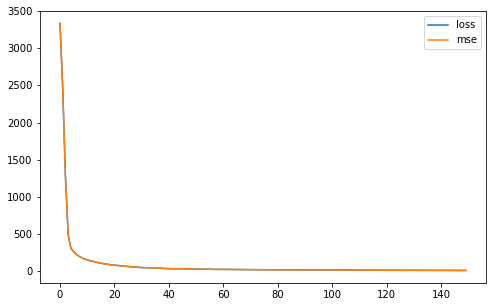

In [220]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [221]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [222]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [223]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [224]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train set prediction accuracy(+-3): 71.88 % <br>
- test set prediction accuracy(+-3): 34.72 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 91.32 % <br>
- test set prediction accuracy(+-5): 50.00 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 99.65 % <br>
- test set prediction accuracy(+-10): 81.94 % <br>
<br>



In [225]:
#x 배열 생성 (시본으로 선별한 특징)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WBC_1','GLU0_1','ALT_1','TG_1','LDL_1',
            'Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WBC_2','GLU0_2','ALT_2','TG_2','LDL_2',
            'Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2']].values

X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [226]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [227]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [228]:
len(x_train), len(x_test)

(288, 72)

In [229]:
X.shape, Y.shape

((360, 15), (360, 1))

In [230]:
dim=X.shape[1]
dim

15

# MLP

In [231]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 3503.1187 - mse: 3503.1187
Epoch 2/150
72/72 - 0s - loss: 2953.7666 - mse: 2953.7666
Epoch 3/150
72/72 - 0s - loss: 2167.2681 - mse: 2167.2681
Epoch 4/150
72/72 - 0s - loss: 1311.2179 - mse: 1311.2179
Epoch 5/150
72/72 - 0s - loss: 650.9197 - mse: 650.9197
Epoch 6/150
72/72 - 0s - loss: 360.5430 - mse: 360.5430
Epoch 7/150
72/72 - 0s - loss: 301.5302 - mse: 301.5302
Epoch 8/150
72/72 - 0s - loss: 261.2922 - mse: 261.2922
Epoch 9/150
72/72 - 0s - loss: 232.2170 - mse: 232.2170
Epoch 10/150
72/72 - 0s - loss: 206.3615 - mse: 206.3615
Epoch 11/150
72/72 - 0s - loss: 189.1823 - mse: 189.1823
Epoch 12/150
72/72 - 0s - loss: 179.0465 - mse: 179.0465
Epoch 13/150
72/72 - 0s - loss: 168.6813 - mse: 168.6813
Epoch 14/150
72/72 - 0s - loss: 162.5022 - mse: 162.5022
Epoch 15/150
72/72 - 0s - loss: 157.0538 - mse: 157.0538
Epoch 16/150
72/72 - 0s - loss: 151.7481 - mse: 151.7481
Epoch 17/150
72/72 - 0s - loss: 147.5046 - mse: 147.5046
Epoch 18/150
72/72 - 0s - loss: 

[121.80634307861328, 121.80634307861328]

In [232]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

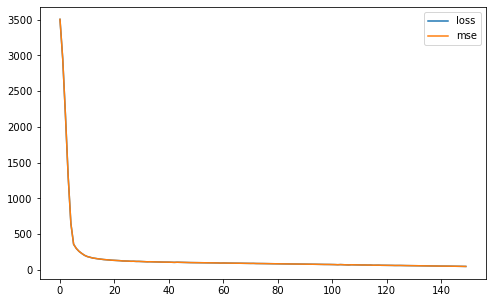

In [233]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [234]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [235]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [236]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [237]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 46.88 % <br>
- test set prediction accuracy(+-3): 19.44 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 63.54 % <br>
- test set prediction accuracy(+-5): 33.33 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 86.81 % <br>
- test set prediction accuracy(+-10): 70.83 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 97.92 % <br>
- test set prediction accuracy(+-20): 90.28 % <br>


In [238]:
#x 배열 생성 (피검사 안하고 할 수 있는 수치)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [239]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [240]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [241]:
len(x_train), len(x_test)

(288, 72)

In [242]:
X.shape, Y.shape

((360, 12), (360, 1))

In [243]:
dim=X.shape[1]
dim

12

# MLP

In [244]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 3495.9221 - mse: 3495.9221
Epoch 2/150
72/72 - 0s - loss: 2932.5312 - mse: 2932.5312
Epoch 3/150
72/72 - 0s - loss: 2048.9573 - mse: 2048.9573
Epoch 4/150
72/72 - 0s - loss: 1039.6245 - mse: 1039.6245
Epoch 5/150
72/72 - 0s - loss: 466.4681 - mse: 466.4681
Epoch 6/150
72/72 - 0s - loss: 331.8402 - mse: 331.8402
Epoch 7/150
72/72 - 0s - loss: 280.3280 - mse: 280.3280
Epoch 8/150
72/72 - 0s - loss: 244.6665 - mse: 244.6665
Epoch 9/150
72/72 - 0s - loss: 219.6311 - mse: 219.6311
Epoch 10/150
72/72 - 0s - loss: 200.4189 - mse: 200.4189
Epoch 11/150
72/72 - 0s - loss: 187.2165 - mse: 187.2165
Epoch 12/150
72/72 - 0s - loss: 177.5354 - mse: 177.5354
Epoch 13/150
72/72 - 0s - loss: 170.4562 - mse: 170.4562
Epoch 14/150
72/72 - 0s - loss: 164.3528 - mse: 164.3528
Epoch 15/150
72/72 - 0s - loss: 158.3164 - mse: 158.3164
Epoch 16/150
72/72 - 0s - loss: 153.3413 - mse: 153.3413
Epoch 17/150
72/72 - 0s - loss: 151.3214 - mse: 151.3214
Epoch 18/150
72/72 - 0s - loss: 

[284.7256774902344, 284.7256774902344]

In [245]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

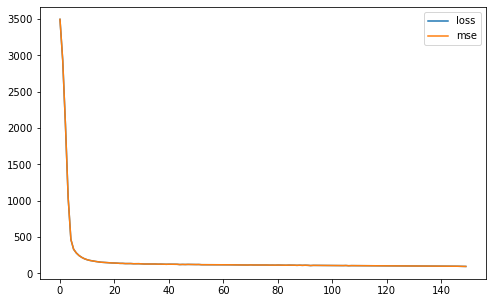

In [246]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [247]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [248]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [249]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [250]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 31.94 % <br>
- test set prediction accuracy(+-3): 12.50 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 46.18 % <br>
- test set prediction accuracy(+-5): 29.17 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 74.31 % <br>
- test set prediction accuracy(+-10): 69.44 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 94.44 % <br>
- test set prediction accuracy(+-20): 91.67 % <br>


In [251]:
#x 배열 생성 (피검사 안하고 할 수 있는 수치 중 선별한 것만)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [252]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [253]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [254]:
len(x_train), len(x_test)

(288, 72)

In [255]:
X.shape, Y.shape

((360, 10), (360, 1))

In [256]:
dim=X.shape[1]
dim

10

# MLP

In [257]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 3537.1548 - mse: 3537.1548
Epoch 2/150
72/72 - 0s - loss: 3055.6523 - mse: 3055.6523
Epoch 3/150
72/72 - 0s - loss: 2217.0525 - mse: 2217.0525
Epoch 4/150
72/72 - 0s - loss: 1146.5502 - mse: 1146.5502
Epoch 5/150
72/72 - 0s - loss: 472.3297 - mse: 472.3297
Epoch 6/150
72/72 - 0s - loss: 334.9715 - mse: 334.9715
Epoch 7/150
72/72 - 0s - loss: 296.1100 - mse: 296.1100
Epoch 8/150
72/72 - 0s - loss: 264.9335 - mse: 264.9335
Epoch 9/150
72/72 - 0s - loss: 241.6303 - mse: 241.6303
Epoch 10/150
72/72 - 0s - loss: 218.6454 - mse: 218.6454
Epoch 11/150
72/72 - 0s - loss: 205.2290 - mse: 205.2290
Epoch 12/150
72/72 - 0s - loss: 192.9594 - mse: 192.9594
Epoch 13/150
72/72 - 0s - loss: 184.5636 - mse: 184.5636
Epoch 14/150
72/72 - 0s - loss: 177.1030 - mse: 177.1030
Epoch 15/150
72/72 - 0s - loss: 170.9918 - mse: 170.9918
Epoch 16/150
72/72 - 0s - loss: 166.0890 - mse: 166.0890
Epoch 17/150
72/72 - 0s - loss: 161.0064 - mse: 161.0064
Epoch 18/150
72/72 - 0s - loss: 

[105.42523956298828, 105.42523956298828]

In [258]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

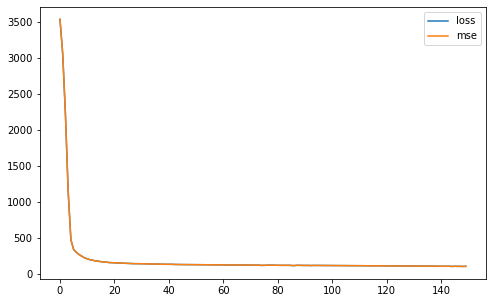

In [259]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [260]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [261]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [262]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [263]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 29.17 % <br>
- test set prediction accuracy(+-3): 22.22 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 41.67 % <br>
- test set prediction accuracy(+-5): 33.33 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 70.83 % <br>
- test set prediction accuracy(+-10): 68.06 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 95.14 % <br>
- test set prediction accuracy(+-20): 94.44 % <br>
